In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashion/fashion-mnist_test.csv
/kaggle/input/fashion/fashion-mnist_train.csv


In [25]:
train=pd.read_csv('/kaggle/input/fashion/fashion-mnist_train.csv')
test=pd.read_csv('/kaggle/input/fashion/fashion-mnist_test.csv')

train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test=np.array(test)
train=np.array(train)
train


array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [27]:
m, n = train.shape #m: rows, n:no. of features+1 cuz label column
#np.random.shuffle(train)
j,k=test.shape

In [28]:
data_dev = train[0:1000].T #each column becomes an example instead of each row
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [29]:
data_test=test.T
Y_test=data_test[0]
X_test=data_test[1:k]
X_test=X_test / 255

In [30]:
data_train = train[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [31]:
Y_train


array([8, 0, 6, ..., 8, 8, 7])

In [32]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    loss=[]
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            loss.append(compute_loss(one_hot(Y), A2))
    return W1, b1, W2, b2, loss

In [33]:
def compute_loss(y_true, y_pred):
    loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / len(y_true)
    return loss

In [34]:
W1, b1, W2, b2, loss = gradient_descent(X_train, Y_train, 0.16, 500)

Iteration:  0
[2 2 2 ... 4 2 2] [8 0 6 ... 8 8 7]
0.11232203389830508
Iteration:  10
[7 0 0 ... 4 2 7] [8 0 6 ... 8 8 7]
0.41640677966101697
Iteration:  20
[7 0 0 ... 4 2 7] [8 0 6 ... 8 8 7]
0.505593220338983
Iteration:  30
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.5543898305084746
Iteration:  40
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.5927457627118644
Iteration:  50
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6101186440677966
Iteration:  60
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6037457627118644
Iteration:  70
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.618457627118644
Iteration:  80
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6278813559322034
Iteration:  90
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6356779661016949
Iteration:  100
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6431864406779662
Iteration:  110
[7 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6500508474576271
Iteration:  120
[5 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6564576271186441
Iteration:  130
[5 6 0 ... 8 8 7] [8 0 6 ... 8 8 7]
0.6624237288135594
Iteration:  140
[

[32721.39525079959, 10059.447349007267, 8150.121909518976, 7185.0906930342435, 6619.071694320928, 6243.703807346839, 6389.333228057957, 6048.409965617048, 5839.074651004974, 5670.581126503788, 5523.5244308484225, 5391.7064242353745, 5273.664764269726, 5167.100641106322, 5069.147738678343, 4979.122760757188, 4895.376318655024, 4817.677411690742, 4745.757050324734, 4678.8375611398205, 4615.611103837142, 4557.049935809004, 4502.647409367898, 4451.33251279333, 4403.855979008529, 4358.720731381167, 4316.745812107896, 4275.73656436557, 4237.451950536532, 4201.623564521209, 4167.154468594082, 4133.75112226427, 4103.130632887709, 4073.7884422121433, 4045.2945272677557, 4017.3302015199392, 3990.175714597849, 3964.5465558810274, 3938.556091252962, 3913.84677129747, 3890.866959789514, 3869.311676678979, 3848.1344532386856, 3827.41778531377, 3808.4918260429195, 3788.8826772117727, 3770.153351253687, 3751.7546738170304, 3733.5446584428983, 3716.1517623000486]


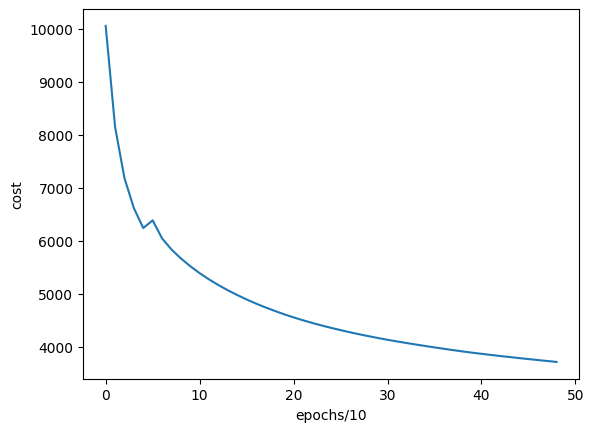

In [35]:
print(loss)
loss=loss[1:]
plt.plot(range(len(loss)),loss)
plt.xlabel('epochs/10')
plt.ylabel('cost')
z1,a1,z2,a2=forward_prop(W1, b1, W2, b2, X_dev)


In [36]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions



In [37]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 7 6 0 3 4 4 5 4 8 0 8 9 6 2 4 9 3 3 3 8 7 6 4 0 6 4 6 7 1 5 0 5 4 6 9 3
 2 2 1 6 0 9 6 0 5 2 7 7 2 5 2 2 4 1 4 9 8 3 6 5 9 6 3 5 8 5 9 8 1 6 8 1 3
 2 8 4 4 8 5 3 2 6 8 1 4 7 3 4 4 6 5 0 1 7 3 7 8 8 3 8 5 0 5 3 0 8 5 4 1 0
 7 6 1 9 7 6 9 3 3 2 6 0 6 3 0 3 5 5 7 7 3 3 6 7 2 3 1 3 1 0 2 3 6 3 6 6 7
 9 3 7 4 6 8 8 0 7 5 6 1 9 5 3 7 0 8 9 7 7 8 0 9 4 0 0 4 1 9 6 7 2 3 0 0 8
 3 5 4 3 5 6 1 7 7 5 7 5 8 3 4 3 9 5 6 5 3 2 7 6 9 6 9 4 1 2 7 3 8 3 1 3 0
 0 6 4 2 8 9 2 8 8 2 6 2 8 7 0 1 4 9 5 1 5 0 7 5 7 2 3 8 6 6 5 9 3 6 9 4 1
 3 3 7 1 6 9 9 4 2 3 6 1 4 9 3 7 4 8 7 3 1 1 8 4 4 1 2 3 1 5 5 8 6 7 2 1 8
 4 5 5 6 3 8 9 9 3 7 0 3 4 6 1 7 8 2 7 3 0 3 5 7 6 1 7 3 2 0 6 4 5 8 2 9 8
 6 8 7 2 2 7 3 0 2 3 6 6 6 6 4 0 8 8 2 3 3 6 5 6 6 7 2 2 7 8 7 4 9 3 2 6 5
 4 1 1 3 5 0 3 5 6 7 5 3 5 8 9 1 0 9 3 6 5 2 3 5 6 3 7 9 3 5 0 0 6 5 6 0 2
 3 2 0 3 5 2 6 9 0 3 0 3 3 1 6 8 4 9 9 0 6 3 7 7 4 8 9 5 2 2 4 9 0 3 0 6 5
 6 5 7 8 7 5 2 4 8 0 3 0 2 0 0 9 2 4 1 0 3 7 0 3 9 9 8 7 0 5 0 3 7 8 3 3 7
 3 6 0 4 6 0 6 0 1 9 9 7 

0.782

In [38]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]


0.7737